In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd 'drive/My Drive/Colab Notebooks/'

# Lahtipakkimine
#!unzip UIDS.zip

# Faili-ja kaustateede määramine
folder = "UIDS/"

import os
files = [os.path.join(root, name)
             for root, dirs, files in os.walk(folder)
             for name in files
             if name.endswith(".txt")]

In [ ]:
import pandas as pd
import numpy as np
import random

In [ ]:
str_uids = []
hex_uids = []
for file in files:
  data = open(file).read().strip().split("\n")
  for d in data:
    if d == "":
      continue
    str_uids.append(d.strip())
    hex_uids.append(int(d.strip(), 16))
print(len(str_uids))

93171


In [ ]:
df_str = pd.DataFrame(str_uids)
df_hex = pd.DataFrame(hex_uids)
df_hex

,0
0,137322203
1,141020825
2,141879796
3,135559445
4,143663169
...,...
93166,134349913
93167,143729430
93168,140810546
93169,146503614


Count: 93,171

Unique values total (including repetitions) : 16,802

Unrepeated values 9,338

Repeated values 93,171 - 9,338 = 83,833


In [ ]:
# The UIDs and how many times they occur in the dataset
df_str[0].value_counts()

0869D2A4    39
084D9A65    36
089D3B77    35
08290306    34
08B3366C    34
            ..
08AF4FCF     1
08D21962     1
08C30F1F     1
08FCA802     1
089D75EB     1
Name: 0, Length: 16802, dtype: int64

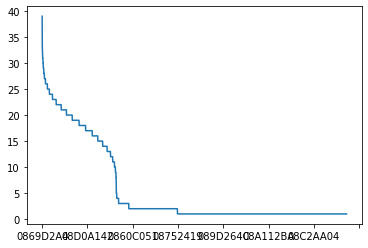

In [ ]:
# Repetitions of the UIDs plotted out
repetitions = df_str[0].value_counts()
repetitions.plot(kind='line')

In [ ]:
# How many of the UIDs occur only once?
d = repetitions.to_dict()
sum(value == 1 for value in d.values())

9338

In [ ]:
# How many randon UIDs need to be generated before there is a significant (over 50%) chance of there being a collision
# Code taken from here: https://www.teamten.com/lawrence/puzzles/birthday_paradox.html#:~:text=The%20odds%20are%20calculated%20by,365%C3%97365%20birthday%20combinations.
number_of_possible_UIDs = 16777216
for N in range(1, number_of_possible_UIDs + 1):
  p = 1.0
  for i in range(1, N + 1):
    p = p * (number_of_possible_UIDs - i + 1) / number_of_possible_UIDs
  p = 1 - p
  if p > 0.5:
    print (N, p)
    break
# Result: With 4823 UIDs, the likelihood of there being to identical is 0.5000085635336378

4823 0.5000085635336378


In [ ]:
# Randomly select 4823 UIDs from the collection and see on average how many collisions there are
#print(hex_uids[:10])
collisions_per_sampling = []
for i in range(1000):
  sample = random.sample(hex_uids, 4823)
  collisions = len(sample) - len(set(sample))
  #print(collisions)
  collisions_per_sampling.append(collisions)
print(np.average(collisions_per_sampling))

1432.223


In [ ]:
# Randomly generate 4823 UIDs and see if the amount of collisions matches what we see in collected data
collisions_per_sampling = []
for i in range(1000):
  sample = [random.randint(0x80000000, 0x80FFFFFF) for j in range(4823)]
  collisions = len(sample) - len(set(sample))
  collisions_per_sampling.append(collisions)
print(np.average(collisions_per_sampling))

0.648


In [ ]:
# Randomly generate the same amount of UIDs as collected in experiments 
# and see if the amount of collisions matches what we see in collected data
collisions_per_sampling = []
for i in range(1000):
  sample = np.random.randint(0x80000000, 0x80FFFFFF, 93171)
  collisions = len(sample) - len(set(sample))
  collisions_per_sampling.append(collisions)
print(np.average(collisions_per_sampling))

257.366


In [ ]:
# Randomly select 200 UIDs from the collection and see on average how many collisions there are
collisions_per_sampling = []
for i in range(1000):
  sample = random.sample(hex_uids, 500)
  collisions = len(sample) - len(set(sample))
  collisions_per_sampling.append(collisions)
print("Average number collisions in collected data",np.average(collisions_per_sampling))

# Now let's generate a 500 UID set many times and see how unlikely the previous result was
allCollisions = []
for i in range(1000000):
  sample = np.random.randint(0x80000000, 0x80FFFFFF, 500)
  collisions = len(sample) - len(set(sample))
  allCollisions.append(collisions)
instancesOfCollisionsOver500 =  [i for i in allCollisions if i > 19]
print("How many times there were equal or more collisions as in the data:", len(instancesOfCollisionsOver500))
print("Likelihood of such a result:", len(instancesOfCollisionsOver500) * 100 / 500000)

Average number collisions in collected data 20.01
How many times there were equal or more collisions as in the data: 0
Likelihood of such a result: 0.0


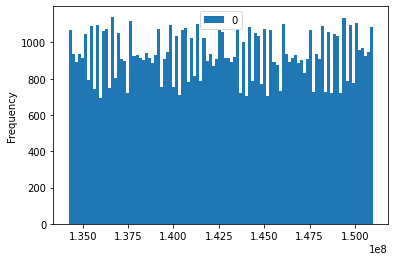

In [ ]:
# Histogram of the collected UIDs (in decimal format)
df_hex.plot.hist(bins=100)

In [ ]:
#df_str.to_csv('out.csv', index = False)